In [82]:
# pip install pyarrow

In [83]:
import pandas as pd
import numpy as np
import pyarrow
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [84]:
data = pd.read_csv('dados_enem.csv', sep=';', encoding='latin-1')

In [85]:
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [86]:
def plot_histogram(x, x_l="Data", y_l="Values", title="Histogram", optimal=False, bins=50):
    if optimal==True:
        q25, q75 = np.percentile(x,[25,75])
        bin_width = 2*(q75 - q25)*len(x)**(-1/3)
        bins = round((x.max() - x.min())/bin_width)
    else:
        bins=bins
    plt.figure(figsize=(20,10))
    plt.hist(x, density=True, bins=bins, label="Data")
    mn, mx = plt.xlim()
    #plt.xlim(mn, mx)
    #kde_xs = np.linspace(mn, mx, 300)
    #kde = st.gaussian_kde(x)
    #plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    #plt.legend(loc="upper left")
    plt.ylabel(y_l)
    plt.xlabel(x_l)
    plt.title(title);

### Reduced dataset

In [87]:
#backup = data.copy()

In [88]:
df = data.sample(frac=0.05,random_state=200).reset_index(drop=True)
#df = data.copy() # Uncomment it when you want to use the full dataset for the analysis

### Filtering some data

In [89]:
# Treineiro
df = df[df.IN_TREINEIRO==0]
# Conclusao ensino medio
df = df[(df.TP_ST_CONCLUSAO==1)|(df.TP_ST_CONCLUSAO==2)]
# Escolas publicas ou privadas
df = df[(df.TP_ESCOLA==2)|(df.TP_ESCOLA==3)]
# Cor/Raca declarados
df = df[df.TP_COR_RACA!=0]

# Remove "I don't know answers"
df = df[df.Q001!='H']
# Remove "I don't know answers"
df = df[df.Q002!='H']
# Remove "I don't know answers"
df = df[df.Q003!='F']
# Remove "I don't know answers"
df = df[df.Q004!='F']

### Selecting our features

In [91]:
selected = ['NU_NOTA_MT', 
            'NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            'NU_NOTA_REDACAO',
           'TP_COR_RACA',
           'TP_ESCOLA',
           'CO_UF_RESIDENCIA',
           'Q001',
           'Q002',
           'Q003',
           'Q004',
           'Q006',
           'Q008',
           'Q009',
           'Q025']

In [92]:
df = df[selected].dropna().reset_index(drop=True)

In [93]:
total = len(df)

## Grade - Math

In [94]:
x = df.NU_NOTA_MT

In [95]:
x.describe()

count    46426.000000
mean       529.931090
std        110.576308
min          0.000000
25%        440.500000
50%        508.100000
75%        607.800000
max        985.000000
Name: NU_NOTA_MT, dtype: float64

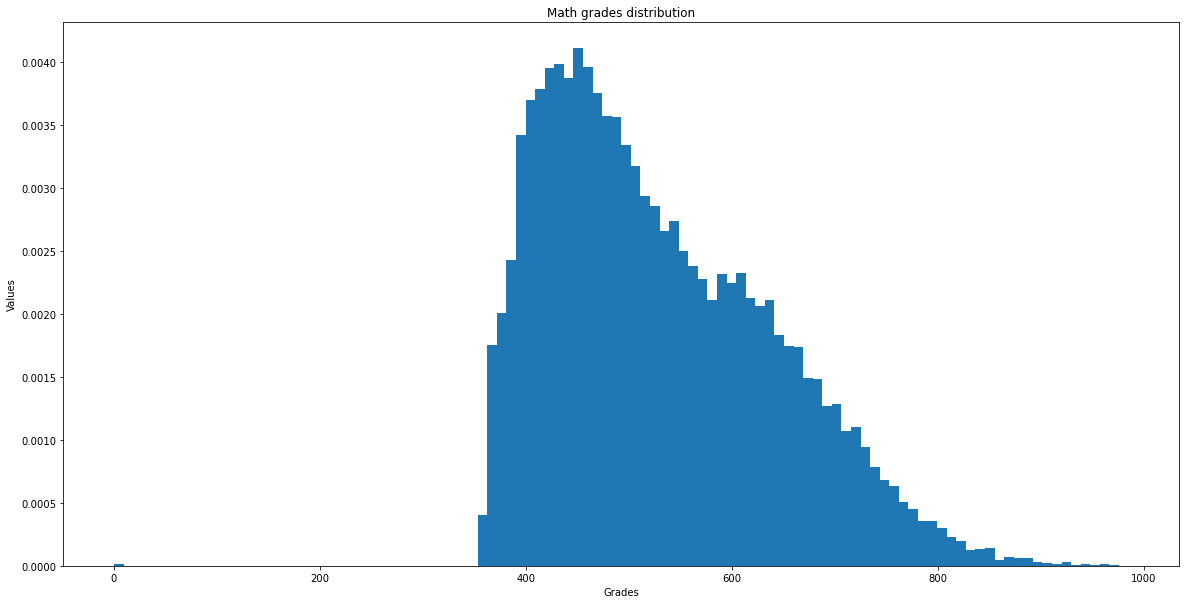

In [96]:
plot_histogram(x, x_l='Grades',title='Math grades distribution', optimal=True)

## Grade - Nature Sciences

In [99]:
x = df.NU_NOTA_CN

In [100]:
x.describe()

count    46426.000000
mean       477.810658
std         76.544958
min          0.000000
25%        416.500000
50%        470.400000
75%        534.700000
max        853.500000
Name: NU_NOTA_CN, dtype: float64

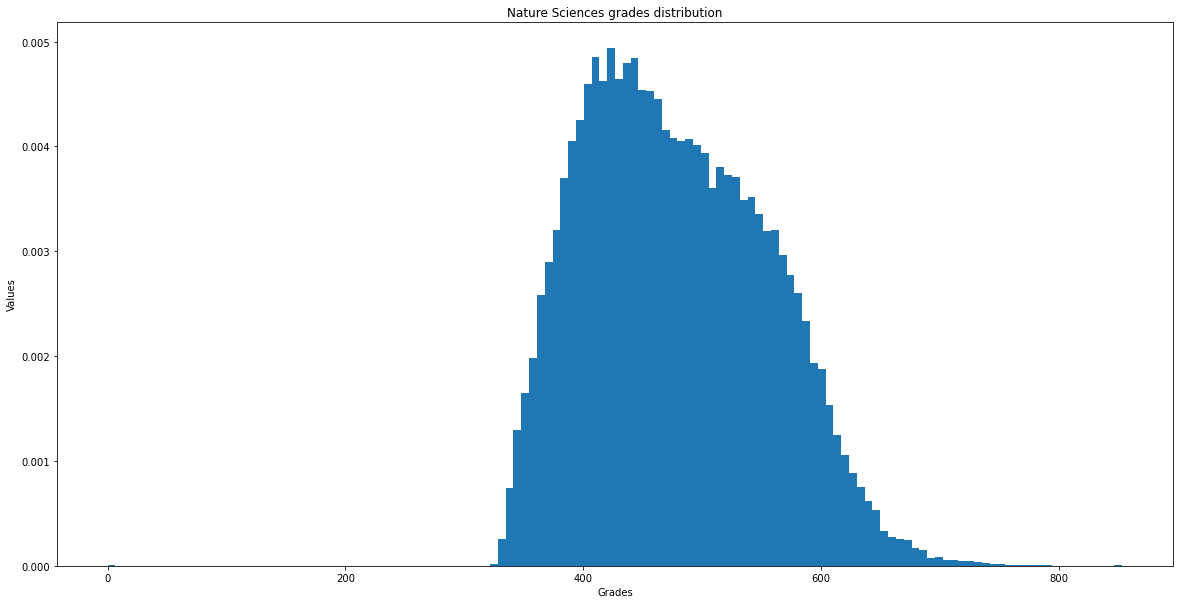

In [101]:
plot_histogram(x, x_l='Grades',title='Nature Sciences grades distribution', optimal=True)

## Grade - Human Sciences

In [102]:
x = df.NU_NOTA_CH

In [103]:
x.describe()

count    46426.000000
mean       509.830750
std         80.976717
min          0.000000
25%        450.225000
50%        513.900000
75%        569.000000
max        790.300000
Name: NU_NOTA_CH, dtype: float64

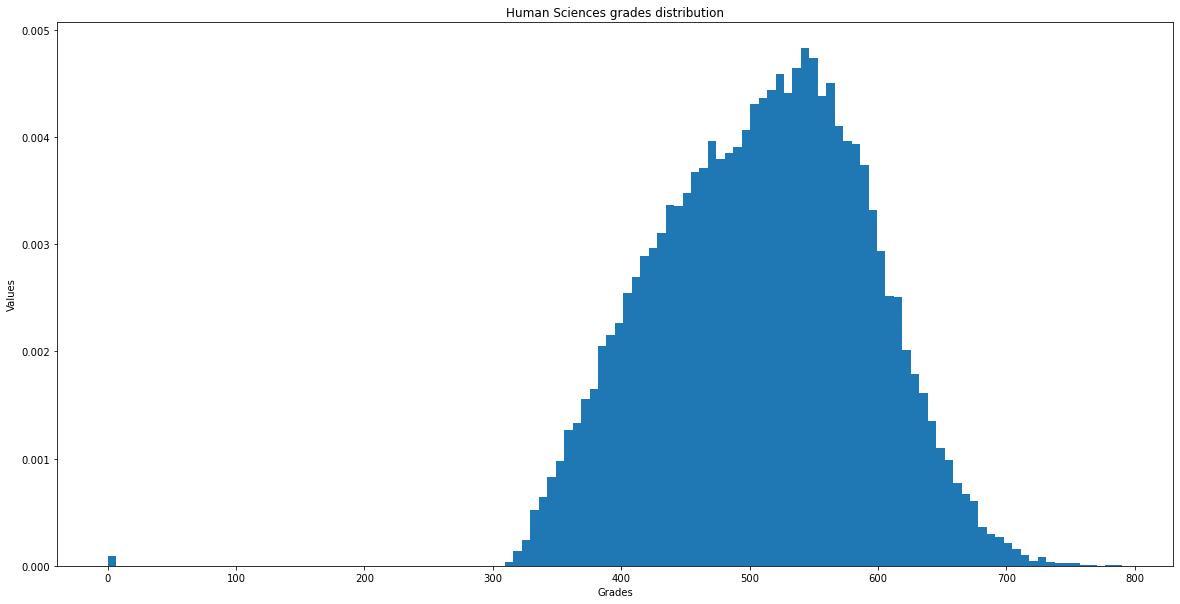

In [104]:
plot_histogram(x, x_l='Grades',title='Human Sciences grades distribution', optimal=True)

## Grade - Language and Codes

In [105]:
x = df.NU_NOTA_LC

In [106]:
x.describe()

count    46426.000000
mean       521.854086
std         63.734001
min          0.000000
25%        484.300000
50%        527.700000
75%        567.300000
max        738.400000
Name: NU_NOTA_LC, dtype: float64

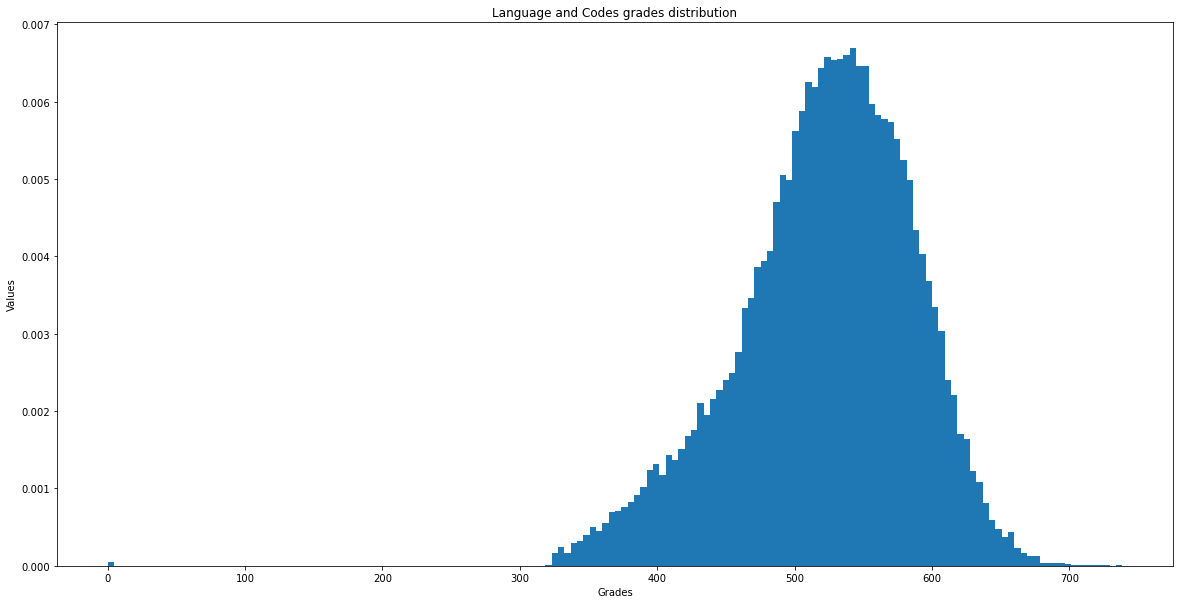

In [107]:
plot_histogram(x, x_l='Grades',title='Language and Codes grades distribution', optimal=True)

## Grade - Essay

In [108]:
x = df.NU_NOTA_REDACAO

In [109]:
x.describe()

count    46426.000000
mean       593.338646
std        188.735138
min          0.000000
25%        500.000000
50%        600.000000
75%        700.000000
max       1000.000000
Name: NU_NOTA_REDACAO, dtype: float64

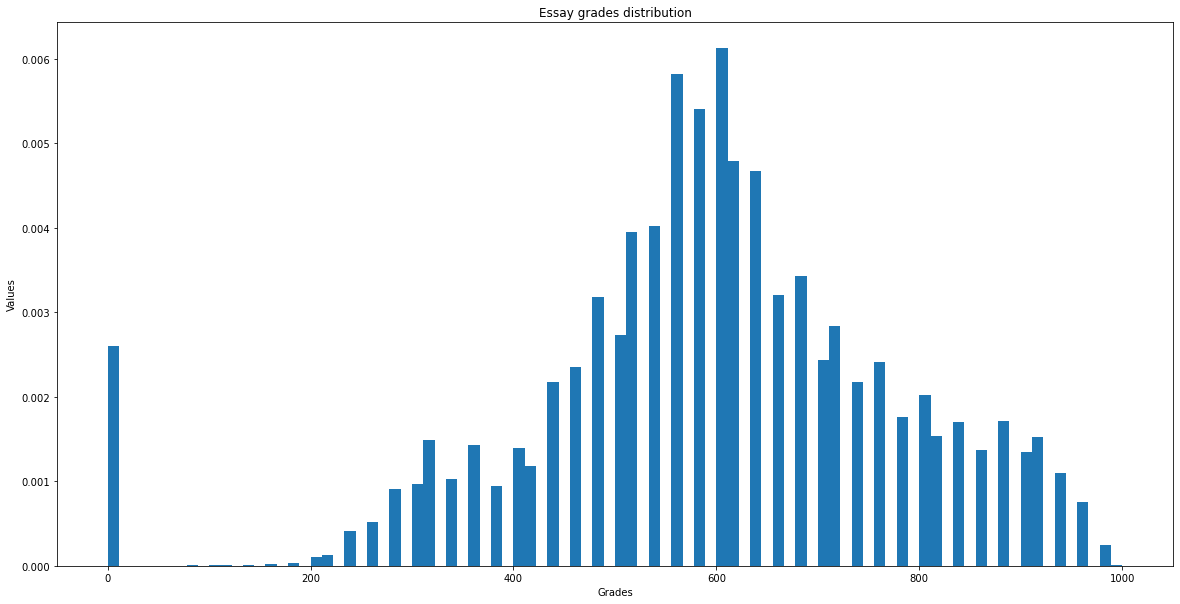

In [110]:
plot_histogram(x, x_l='Grades',title='Essay grades distribution', optimal=True)

## Income

In [16]:
x = (df.Q006.value_counts().sort_index()/total)*100

<BarContainer object of 17 artists>

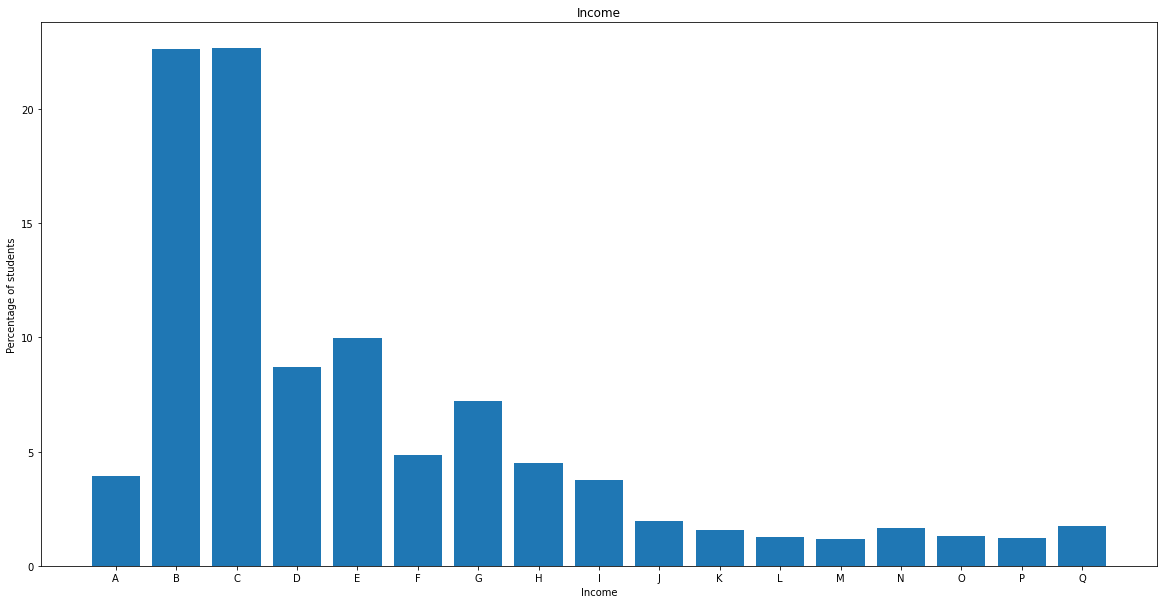

In [17]:
plt.figure(figsize=(20,10))
plt.title('Income')
plt.ylabel('Percentage of students')
plt.xlabel('Income')
plt.bar(x.index, x)

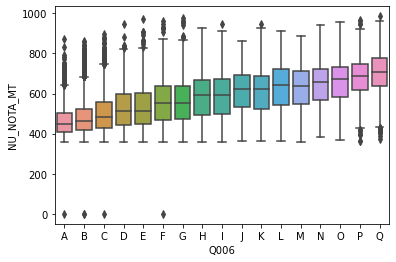

In [18]:
sns.boxplot(y='NU_NOTA_MT', x='Q006', 
                 data=df, order=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

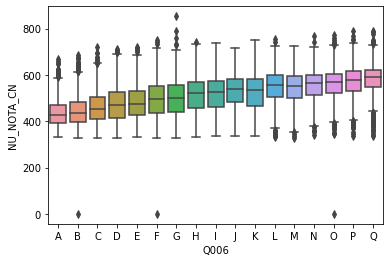

In [114]:
sns.boxplot(y='NU_NOTA_CN', x='Q006', 
                 data=df, order=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

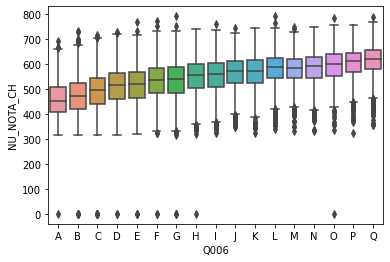

In [113]:
sns.boxplot(y='NU_NOTA_CH', x='Q006', 
                 data=df, order=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

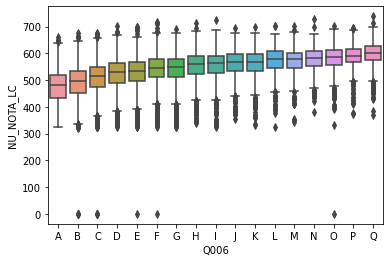

In [115]:
sns.boxplot(y='NU_NOTA_LC', x='Q006', 
                 data=df, order=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

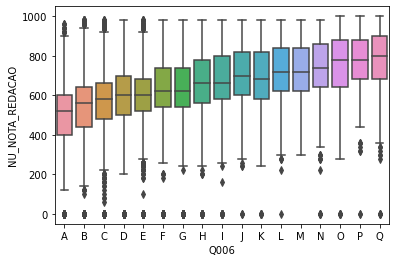

In [116]:
sns.boxplot(y='NU_NOTA_REDACAO', x='Q006', 
                 data=df, order=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

## Type of School

In [19]:
x = (df.TP_ESCOLA.value_counts().sort_index()/total)*100

<BarContainer object of 2 artists>

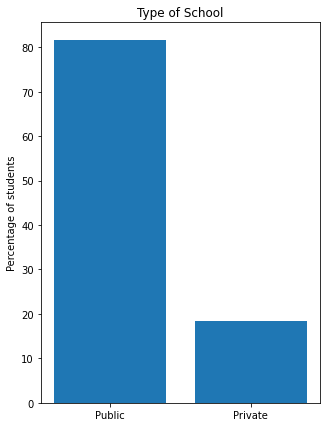

In [20]:
plt.figure(figsize=(5,7))
plt.title('Type of School')
plt.ylabel('Percentage of students')
plt.bar(['Public','Private'], x)

TP_ESCOLA      2    3
Q006                 
A           1774   47
B          10211  300
C           9906  630
D           3469  575
E           4074  561
F           1686  570
G           2629  717
H           1344  753
I           1069  684
J            455  463
K            370  356
L            217  361
M            199  348
N            221  546
O            151  462
P             86  471
Q             58  742


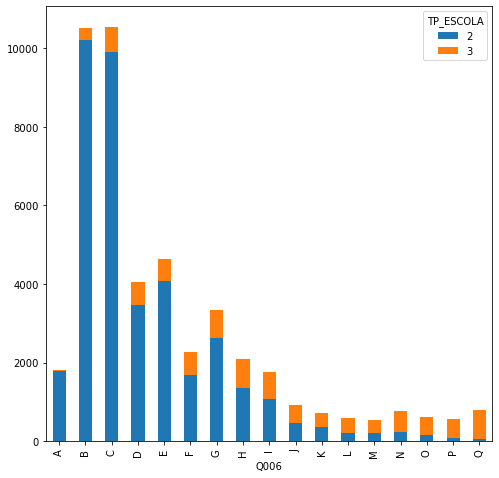

In [21]:
table = pd.crosstab(df.Q006, df.TP_ESCOLA)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

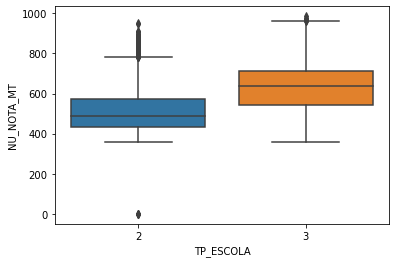

In [22]:
sns.boxplot(y='NU_NOTA_MT', x='TP_ESCOLA', 
                 data=df)

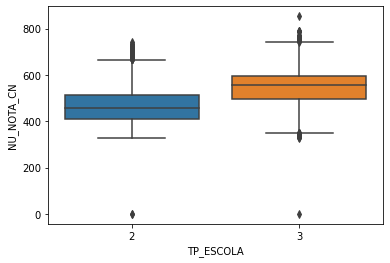

In [117]:
sns.boxplot(y='NU_NOTA_CN', x='TP_ESCOLA', 
                 data=df)

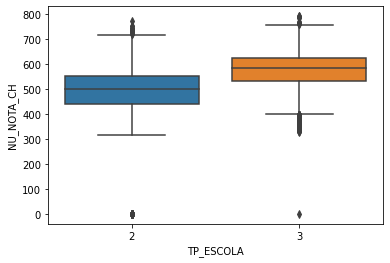

In [118]:
sns.boxplot(y='NU_NOTA_CH', x='TP_ESCOLA', 
                 data=df)

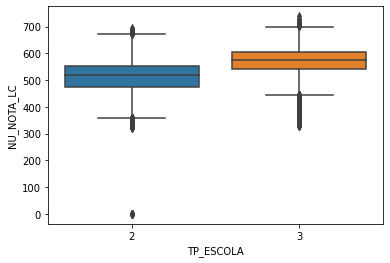

In [119]:
sns.boxplot(y='NU_NOTA_LC', x='TP_ESCOLA', 
                 data=df)

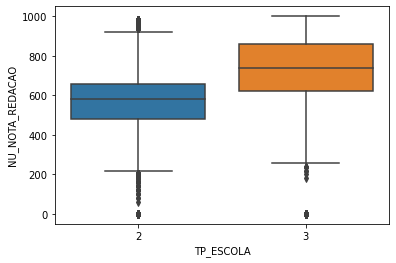

In [120]:
sns.boxplot(y='NU_NOTA_REDACAO', x='TP_ESCOLA', 
                 data=df)

## Student Region

In [122]:
df['REGION'] = (df['CO_UF_RESIDENCIA'].astype(str).str[:1]).astype(int)

In [123]:
x = (df.REGION.value_counts().sort_index()/total)*100

<BarContainer object of 5 artists>

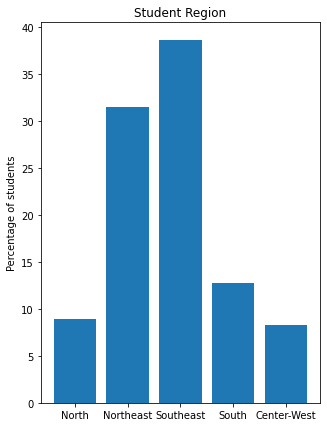

In [124]:
plt.figure(figsize=(5,7))
plt.title('Student Region')
plt.ylabel('Percentage of students')
plt.bar(['North', 'Northeast', 'Southeast', 'South', 'Center-West'], x)

REGION     1     2     3     4    5
Q006                               
A        251  1196   267    52   43
B       1396  6082  2009   432  558
C       1124  3546  3821  1077  952
D        295   871  1855   637  378
E        257   800  2250   867  457
F        120   348  1062   527  199
G        204   453  1714   669  304
H        106   296  1088   426  181
I         93   262   886   339  172
J         57   145   465   158   93
K         36    89   395   131   75
L         27    80   305   106   59
M         34    91   284    82   56
N         39   108   426   117   77
O         34    77   333   101   68
P         26    79   306    83   63
Q         22   124   461    99   93


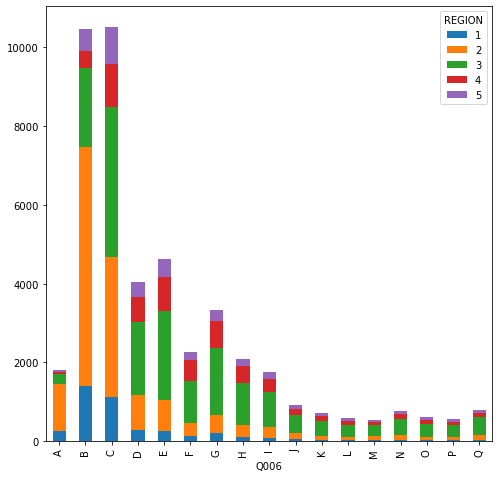

In [125]:
table = pd.crosstab(df.Q006, df.REGION)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

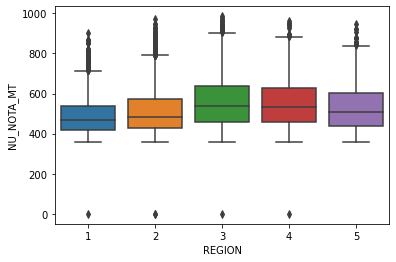

In [126]:
sns.boxplot(y='NU_NOTA_MT', x='REGION', 
                 data=df)

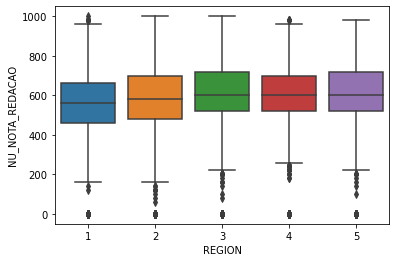

In [127]:
sns.boxplot(y='NU_NOTA_REDACAO', x='REGION', 
                 data=df)

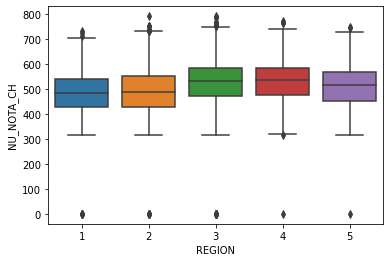

In [128]:
sns.boxplot(y='NU_NOTA_CH', x='REGION', 
                 data=df)

## Color/Race

In [28]:
x = (df.TP_COR_RACA.value_counts().sort_index()/total)*100

<BarContainer object of 5 artists>

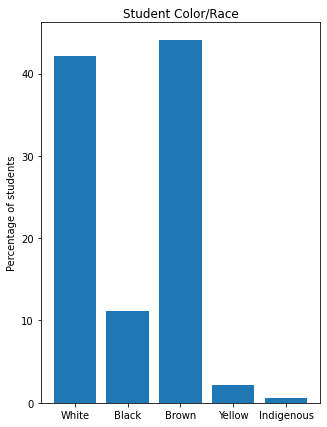

In [29]:
plt.figure(figsize=(5,7))
plt.title('Student Color/Race')
plt.ylabel('Percentage of students')
plt.bar(['White', 'Black', 'Brown', 'Yellow', 'Indigenous'], x)

TP_COR_RACA     1     2     3    4   5
Q006                                  
A             358   254  1145   47  17
B            2357  1587  6199  273  95
C            3414  1484  5322  252  64
D            1764   438  1740   80  22
E            2185   495  1838   96  21
F            1249   190   768   41   8
G            1832   260  1176   62  16
H            1306   122   622   39   8
I            1128   101   501   20   3
J             622    47   228   19   2
K             472    47   194   13   0
L             398    22   141   14   3
M             364    34   135   12   2
N             549    35   160   23   0
O             462    20   114   15   2
P             445    13    88   10   1
Q             670    15   102   13   0


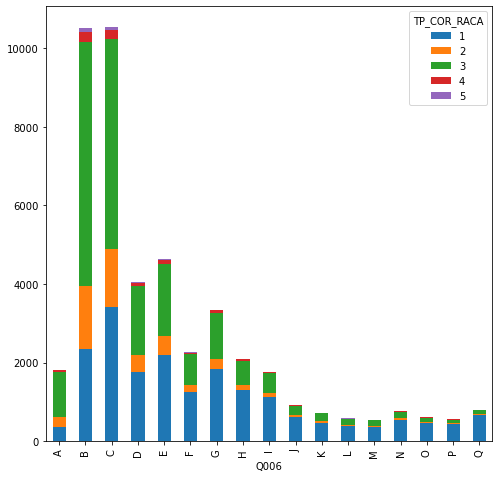

In [30]:
table = pd.crosstab(df.Q006, df.TP_COR_RACA)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

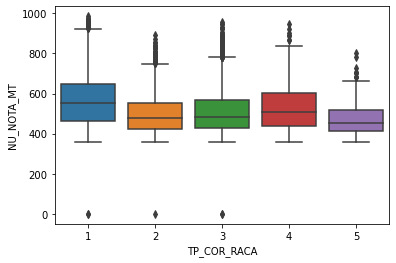

In [31]:
sns.boxplot(y='NU_NOTA_MT', x='TP_COR_RACA', 
                 data=df)

## Father Formation

- A	Nunca estudou.
- B	Não completou a 4ª série/5º ano do Ensino Fundamental.
- C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
- D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
- E	Completou o Ensino Médio, mas não completou a Faculdade.
- F	Completou a Faculdade, mas não completou a Pós-graduação.
- G	Completou a Pós-graduação.
- H	Não sei.

In [32]:
x = (df.Q001.value_counts().sort_index()/total)*100

<BarContainer object of 7 artists>

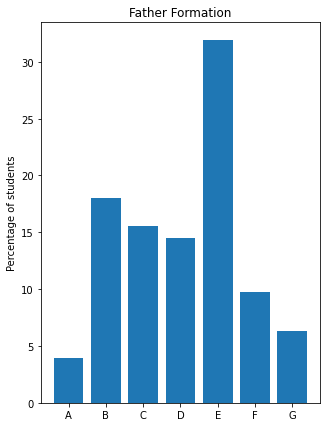

In [33]:
plt.figure(figsize=(5,7))
plt.title('Father Formation')
plt.ylabel('Percentage of students')
plt.bar(x.index, x)

Q001     A     B     C     D     E    F    G
Q006                                        
A      305   697   293   199   279   34   14
B     1004  3489  2146  1579  2053  186   54
C      370  2328  2084  1862  3353  413  126
D       71   618   726   760  1508  258  103
E       54   576   754   812  1947  368  124
F        9   197   321   352  1001  271  105
G       19   250   418   505  1487  476  191
H        3    98   189   223   971  415  198
I        5    57   133   175   771  380  232
J        2    25    38    87   372  257  137
K        1     9    36    58   262  216  144
L        0     9    23    33   179  188  146
M        1     9    18    28   155  193  143
N        1     7    21    26   217  246  249
O        0     6    12    24   105  213  253
P        0     2    13    14    79  182  267
Q        1     6    11    18    86  234  444


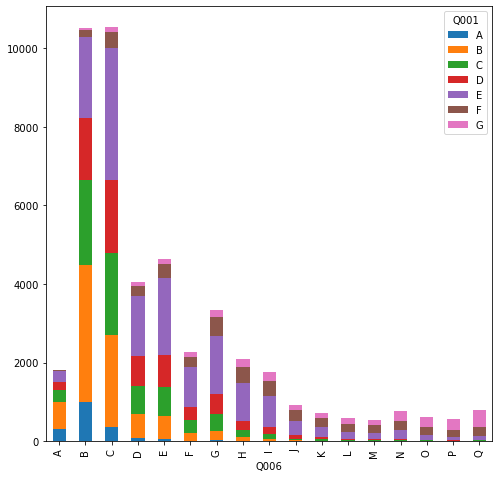

In [34]:
table = pd.crosstab(df.Q006, df.Q001)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

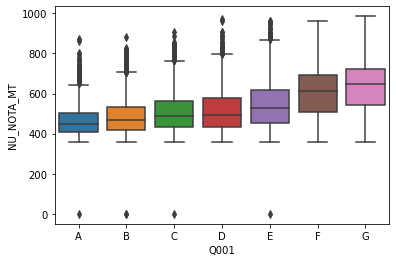

In [35]:
sns.boxplot(y='NU_NOTA_MT', x='Q001', 
                 data=df, order=["A", "B", "C", "D", "E", "F", "G"])

## Mother Formation

In [36]:
x = (df.Q002.value_counts().sort_index()/total)*100

<BarContainer object of 7 artists>

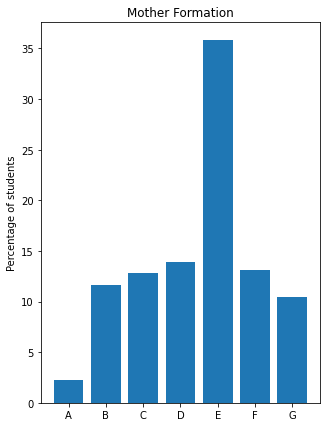

In [37]:
plt.figure(figsize=(5,7))
plt.title('Mother Formation')
plt.ylabel('Percentage of students')
plt.bar(x.index, x)

Q002    A     B     C     D     E    F    G
Q006                                       
A     205   507   336   269   444   40   20
B     527  2453  2080  1786  3216  323  126
C     228  1477  1703  1923  4189  706  310
D      50   360   510   672  1773  455  224
E      31   283   567   690  2077  610  377
F       9   104   209   269   967  427  271
G      10   131   245   393  1401  653  513
H       3    51   100   174   785  531  453
I       1    28    89   138   590  456  451
J       0     9    28    44   283  286  268
K       0     9    32    31   206  226  222
L       1     3    12    15   154  185  208
M       0     4    10    18   123  212  180
N       0     1     7    20   168  263  308
O       0     2     4    18   116  205  268
P       0     2     3    10    79  217  246
Q       1     1     6     8    73  302  409


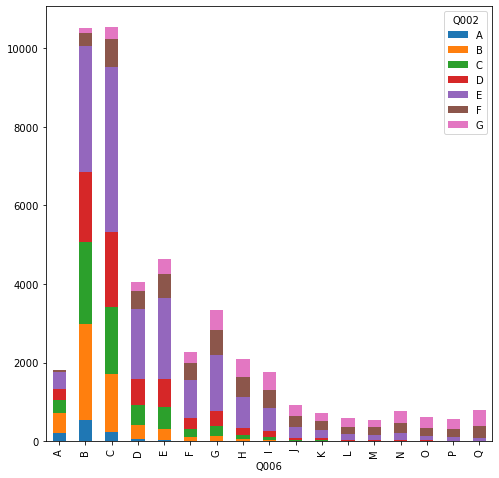

In [38]:
table = pd.crosstab(df.Q006, df.Q002)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

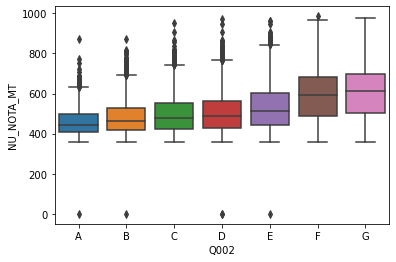

In [39]:
sns.boxplot(y='NU_NOTA_MT', x='Q002', 
                 data=df, order=["A", "B", "C", "D", "E", "F", "G"])

## Father Profession

- A	Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.
- B	Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.
- C	Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.
- D	Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.
- E	Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.
- F	Não sei.

In [40]:
x = (df.Q003.value_counts().sort_index()/total)*100

<BarContainer object of 5 artists>

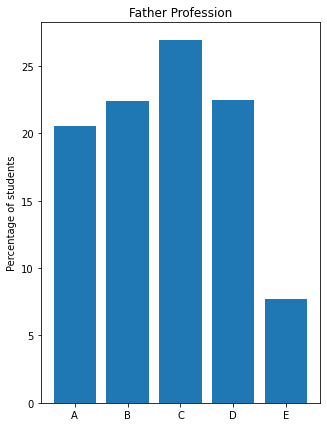

In [41]:
plt.figure(figsize=(5,7))
plt.title('Father Profession')
plt.ylabel('Percentage of students')
plt.bar(x.index, x)

Q003     A     B     C     D    E
Q006                             
A     1142   336   248    75   20
B     4642  2858  2269   676   66
C     2206  3328  3516  1354  132
D      507  1060  1539   842   96
E      460  1183  1774  1096  122
F      179   427   769   768  113
G      195   604  1084  1274  189
H       78   248   522  1010  239
I       62   170   377   883  261
J       20    67   148   495  188
K       14    45   111   406  150
L       11    22    53   320  172
M        3    21    29   300  194
N       10    19    38   391  309
O        4    11    18   272  308
P        5     7    12   171  362
Q        5     5     8   125  657


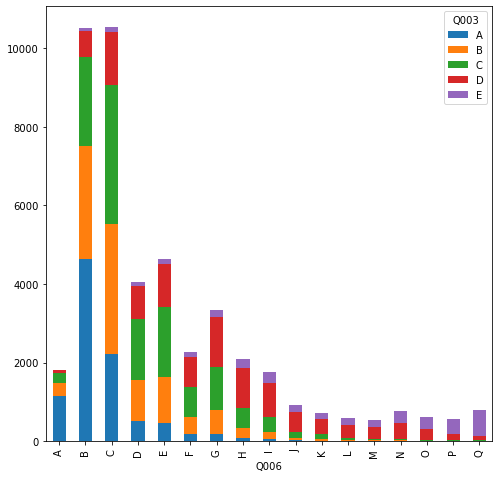

In [42]:
table = pd.crosstab(df.Q006, df.Q003)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

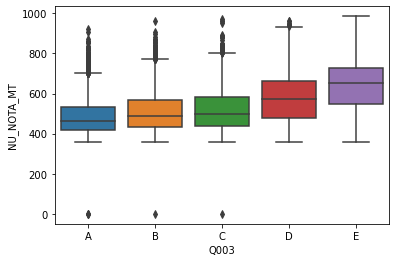

In [43]:
sns.boxplot(y='NU_NOTA_MT', x='Q003', 
                 data=df, order=["A", "B", "C", "D", "E"])

## Mother Profession

In [44]:
x = (df.Q004.value_counts().sort_index()/total)*100

<BarContainer object of 5 artists>

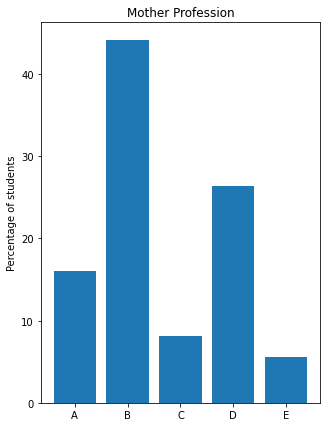

In [45]:
plt.figure(figsize=(5,7))
plt.title('Mother Profession')
plt.ylabel('Percentage of students')
plt.bar(x.index, x)

Q004     A     B     C     D    E
Q006                             
A     1086   582    58    79   16
B     3895  5235   669   677   35
C     1586  6189  1107  1589   65
D      320  2207   457   995   65
E      256  2362   518  1413   86
F       85   940   233   911   87
G      110  1352   288  1443  153
H       36   580   159  1156  166
I       22   433   109   993  196
J        9   170    43   558  138
K        9   130    34   448  105
L        5    81    20   345  127
M        3    67    12   331  134
N        5    73    13   443  233
O        5    57    11   340  200
P        7    18    14   271  247
Q        2    23     6   257  512


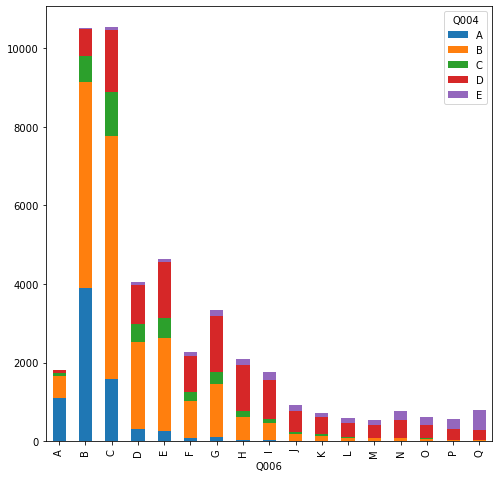

In [46]:
table = pd.crosstab(df.Q006, df.Q004)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

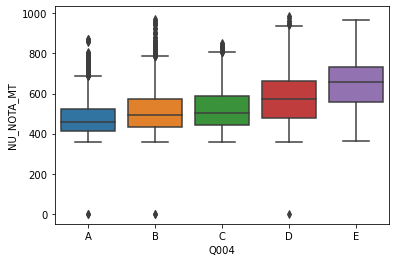

In [47]:
sns.boxplot(y='NU_NOTA_MT', x='Q004', 
                 data=df, order=["A", "B", "C", "D", "E"])

## House Size

In [48]:
## Transforming number of bathrooms column into integer format
df.Q008 = [ ord(x) - 65 for x in df.Q008]

In [49]:
## Transforming number of bedrooms column into integer format
df.Q009 = [ ord(x) - 65 for x in df.Q009]

In [50]:
## Creating control variable "House Size"
df['HOUSE'] = df.Q008 + df.Q009

In [51]:
x = df.HOUSE

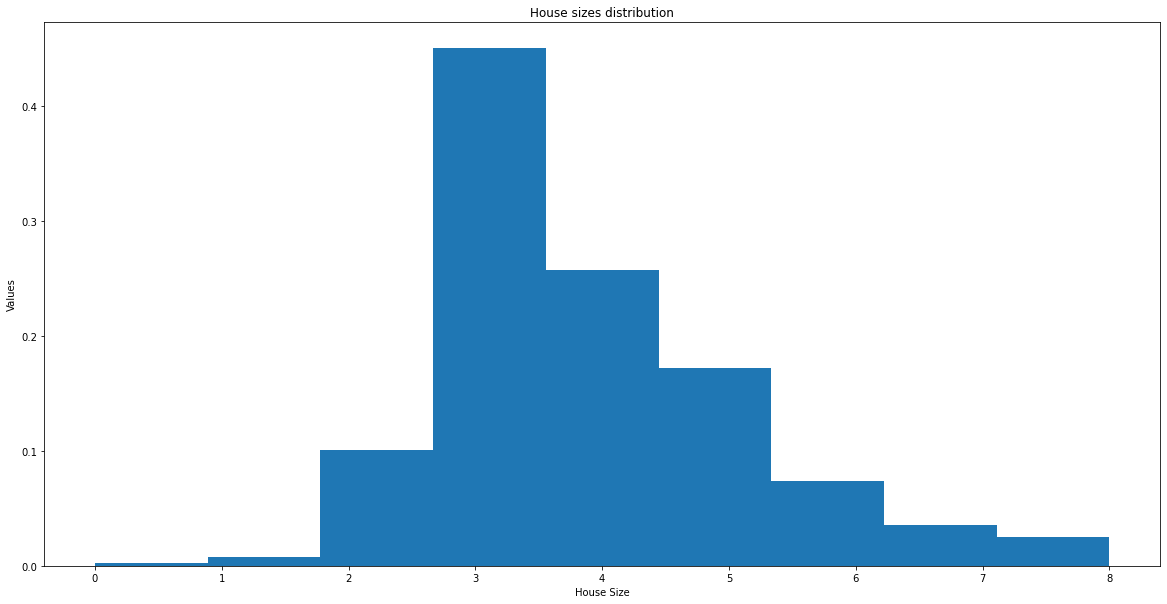

In [52]:
plot_histogram(x, x_l='House Size',title='House sizes distribution', optimal=False, bins=9)

In [53]:
df.HOUSE.describe()

count    46505.000000
mean         3.860144
std          1.373613
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: HOUSE, dtype: float64

HOUSE   0    1     2     3     4     5    6    7    8
Q006                                                 
0      33   71   450   892   261    83   20    7    4
1      30  159  1866  5771  2002   560  100   19    4
2      18   57  1146  5405  2554  1066  238   36   16
3       2    9   244  1778  1135   668  160   26   22
4       1   11   230  1859  1356   868  222   67   21
5       2    0    76   715   677   506  198   56   26
6       0    3    91  1030   942   865  283   88   44
7       0    1    34   469   531   597  306  109   50
8       0    2    14   309   423   557  287  108   53
9       0    1     9   118   184   301  181   79   45
10      0    0     3   100   148   219  146   84   26
11      0    0     0    47    95   183  130   84   39
12      0    0     1    40    92   134  145   78   57
13      0    0     2    44   110   204  190  125   92
14      0    0     2    24    64   135  159  140   89
15      0    0     5    13    44   105  123  135  132
16      1    0     1     9  

AttributeError: 'Rectangle' object has no property 'x_l'

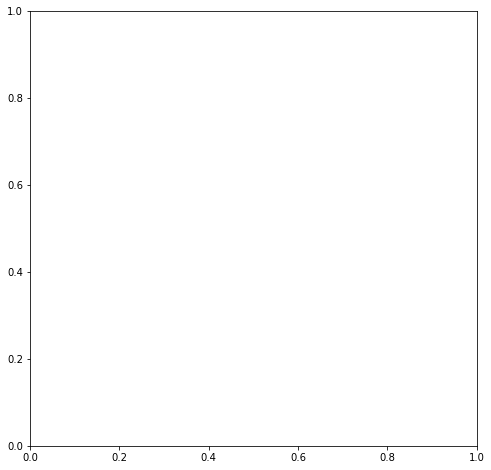

In [80]:
table = pd.crosstab(df.Q006, df.HOUSE)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True,  title='House size versus Income', x_l='test')


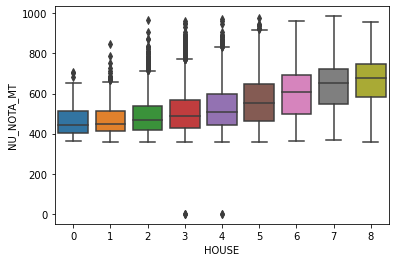

In [55]:
sns.boxplot(y='NU_NOTA_MT', x='HOUSE', 
                 data=df)

## Internet Access

In [56]:
x = (df.Q025.value_counts().sort_index()/total)*100

<BarContainer object of 2 artists>

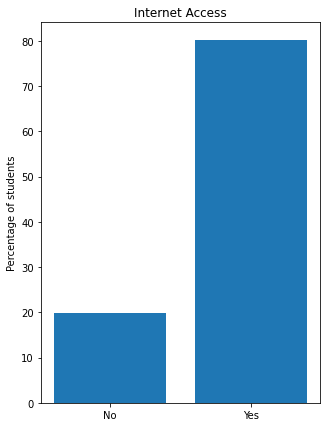

In [57]:
plt.figure(figsize=(5,7))
plt.title('Internet Access')
plt.ylabel('Percentage of students')
plt.bar(['No','Yes'], x)

Q025     0     1
Q006            
0     1102   719
1     4626  5885
2     2384  8152
3      427  3617
4      372  4263
5      115  2141
6      127  3219
7       38  2059
8       29  1724
9       11   907
10       8   718
11       4   574
12       3   544
13       4   763
14       0   613
15       4   553
16       4   796


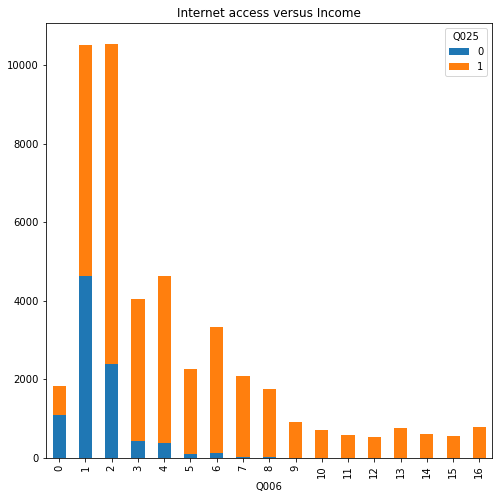

In [69]:
table = pd.crosstab(df.Q006, df.Q025)
print(table)
table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True,
          title='Internet access versus Income')

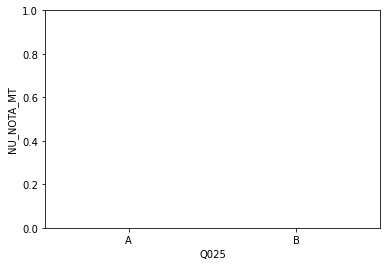

In [72]:
sns.boxplot(y='NU_NOTA_MT', x='Q025', 
                 data=df, order=['A', 'B'])

## General Description without transforming to numeric values
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

What we need is something that will look like correlation, but will work with categorical values — or more formally, we’re looking for a measure of association between two categorical features. Introducing: Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
- Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
- Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

In [60]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [61]:
variables_selected = ['TP_COR_RACA', 'TP_ESCOLA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q025', 'REGION', 'HOUSE']

factors_paired = [(i,j) for i in variables_selected
                  for j in variables_selected] 

corr = []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = cramers_v(df[f[0]], df[f[1]])
        corr.append(chitest)
    else:      # for same factor pair
        corr.append(1)

matrix_corr = np.array(corr).reshape((len(variables_selected),len(variables_selected))) # shape it as a matrix
matrix_corr = pd.DataFrame(matrix_corr, index=variables_selected, columns=variables_selected) # then a df for convenience
matrix_corr

,TP_COR_RACA,TP_ESCOLA,Q001,Q002,Q003,Q004,Q006,Q025,REGION,HOUSE
TP_COR_RACA,1.000000,0.230731,0.127700,0.114073,0.134724,0.126948,0.176301,0.209535,0.193819,0.132568
TP_ESCOLA,0.230731,1.000000,0.447406,0.418236,0.503397,0.480007,0.550655,0.204777,0.119452,0.453107
Q001,0.127700,0.447406,1.000000,0.350618,0.398165,0.304029,0.283157,0.331403,0.124675,0.191365
Q002,0.114073,0.418236,0.350618,1.000000,0.289782,0.390883,0.253641,0.327991,0.101841,0.178570
Q003,0.134724,0.503397,0.398165,0.289782,1.000000,0.475868,0.397594,0.384696,0.155769,0.272092
Q004,0.126948,0.480007,0.304029,0.390883,0.475868,1.000000,0.380325,0.381136,0.164418,0.256951
Q006,0.176301,0.550655,0.283157,0.253641,0.397594,0.380325,1.000000,0.447341,0.224696,0.263069
Q025,0.209535,0.204777,0.331403,0.327991,0.384696,0.381136,0.447341,1.000000,0.307473,0.343296
REGION,0.193819,0.119452,0.124675,0.101841,0.155769,0.164418,0.224696,0.307473,1.000000,0.116143
HOUSE,0.132568,0.453107,0.191365,0.178570,0.272092,0.256951,0.263069,0.343296,0.116143,1.000000


## General Description transforming to numeric values

In [62]:
df.shape
df.describe()

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,CO_UF_RESIDENCIA,Q008,Q009,REGION,HOUSE
count,46505.000000,46505.000000,46505.000000,46505.000000,46505.000000,46505.000000,46505.000000,46505.000000
mean,529.823896,2.080593,2.184625,31.657736,1.488528,2.371616,2.798280,3.860144
std,110.556335,0.997135,0.387997,9.620208,0.814697,0.756896,1.042457,1.373613
min,0.000000,1.000000,2.000000,11.000000,0.000000,0.000000,1.000000,0.000000
25%,440.400000,1.000000,2.000000,25.000000,1.000000,2.000000,2.000000,3.000000
50%,508.000000,2.000000,2.000000,31.000000,1.000000,2.000000,3.000000,4.000000
75%,607.700000,3.000000,2.000000,35.000000,2.000000,3.000000,3.000000,5.000000
max,985.000000,5.000000,3.000000,53.000000,4.000000,4.000000,5.000000,8.000000


In [63]:
## Transforming string data into integer

df.Q001 = [ ord(x) - 65 for x in df.Q001]
df.Q002 = [ ord(x) - 65 for x in df.Q002]
df.Q003 = [ ord(x) - 65 for x in df.Q003]
df.Q004 = [ ord(x) - 65 for x in df.Q004]
df.Q006 = [ ord(x) - 65 for x in df.Q006]
df.Q025 = [ ord(x) - 65 for x in df.Q025]

In [64]:
df.describe().round(2)

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,CO_UF_RESIDENCIA,Q001,Q002,Q003,Q004,Q006,Q008,Q009,Q025,REGION,HOUSE
count,46505.00,46505.00,46505.00,46505.00,46505.00,46505.00,46505.00,46505.00,46505.00,46505.00,46505.00,46505.0,46505.00,46505.00
mean,529.82,2.08,2.18,31.66,3.07,3.50,1.74,1.61,4.10,1.49,2.37,0.8,2.80,3.86
std,110.56,1.00,0.39,9.62,1.58,1.54,1.23,1.19,3.74,0.81,0.76,0.4,1.04,1.37
min,0.00,1.00,2.00,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00
25%,440.40,1.00,2.00,25.00,2.00,2.00,1.00,1.00,1.00,1.00,2.00,1.0,2.00,3.00
50%,508.00,2.00,2.00,31.00,3.00,4.00,2.00,1.00,3.00,1.00,2.00,1.0,3.00,4.00
75%,607.70,3.00,2.00,35.00,4.00,4.00,3.00,3.00,6.00,2.00,3.00,1.0,3.00,5.00
max,985.00,5.00,3.00,53.00,6.00,6.00,4.00,4.00,16.00,4.00,4.00,1.0,5.00,8.00


In [65]:
df.corr()

,NU_NOTA_MT,TP_COR_RACA,TP_ESCOLA,CO_UF_RESIDENCIA,Q001,Q002,Q003,Q004,Q006,Q008,Q009,Q025,REGION,HOUSE
NU_NOTA_MT,1.000000,-0.223029,0.416191,0.139578,0.372592,0.353491,0.380849,0.374624,0.489893,0.387173,0.240688,0.245790,0.138237,0.362260
TP_COR_RACA,-0.223029,1.000000,-0.203147,-0.253535,-0.221539,-0.194752,-0.229784,-0.220507,-0.298077,-0.232039,-0.167783,-0.195226,-0.250084,-0.230076
TP_ESCOLA,0.416191,-0.203147,1.000000,0.066785,0.398510,0.371989,0.440159,0.442177,0.542891,0.482417,0.264063,0.204897,0.050186,0.431629
CO_UF_RESIDENCIA,0.139578,-0.253535,0.066785,1.000000,0.159787,0.136981,0.199392,0.174162,0.246717,0.147510,0.156403,0.260713,0.977050,0.173671
Q001,0.372592,-0.221539,0.398510,0.159787,1.000000,0.601715,0.611115,0.508453,0.546591,0.421790,0.255600,0.323487,0.150385,0.391008
Q002,0.353491,-0.194752,0.371989,0.136981,0.601715,1.000000,0.493303,0.638855,0.513945,0.392227,0.253194,0.322013,0.128438,0.372148
Q003,0.380849,-0.229784,0.440159,0.199392,0.611115,0.493303,1.000000,0.625558,0.603518,0.474723,0.281961,0.364034,0.188402,0.436928
Q004,0.374624,-0.220507,0.442177,0.174162,0.508453,0.638855,0.625558,1.000000,0.599008,0.470703,0.287097,0.334021,0.165756,0.437374
Q006,0.489893,-0.298077,0.542891,0.246717,0.546591,0.513945,0.603518,0.599008,1.000000,0.643847,0.425142,0.338140,0.242129,0.616133
Q008,0.387173,-0.232039,0.482417,0.147510,0.421790,0.392227,0.474723,0.470703,0.643847,1.000000,0.527205,0.270602,0.140039,0.883608


## Export Final Dataset

In [66]:
# Use this cell to export the final cleaned dataset, so we can use in another notebook for the regression analysis

In [67]:
#df.to_parquet('final_enem.parquet', engine='pyarrow', compression='gzip')

## Base Regression Model

In [68]:
# deixei aqui p facilitar quando eu for perguntar p ela se precisa omitir tudo mesmo
import statsmodels.formula.api as smf
lm = smf.ols('NU_NOTA_MT ~ C(Q006)', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NU_NOTA_MT   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     939.4
Date:                Tue, 18 May 2021   Prob (F-statistic):               0.00
Time:                        20:38:56   Log-Likelihood:            -2.7830e+05
No. Observations:               46505   AIC:                         5.566e+05
Df Residuals:                   46488   BIC:                         5.568e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       465.2478      2.253    206.545      0.000     460.833     469.663
C(Q006)[T.1]     13.1572      2.440      5.393      0.000       8.375      17.939
C(Q006)[T.2]     33.7563      2.439     13.838      0.000      28.975      38.538
C(Q006)[T.3]     59.5065      2.713     21.936      0.000      54.190      64.823
C(Q006)[T.4]     64.4642      2.658     24.249      0.000      59.254      69.675
C(Q006)[T.5]     91.4737      3.028     30.208      0.000      85.539      97.409
C(Q006)[T.6]     94.7314      2.799     33.843      0.000      89.245     100.218
C(Q006)[T.7]    119.6875      3.079     38.873      0.000     113.653     125.722
C(Q006)[T.8]    122.1147      3.216     37.967      0.000     115.811     128.419
C(Q006)[T.9]    145.2167      3.891     37.323      0.000     137.591     152.843
C(Q006)[T.10]   142.6818      4.219     33.818      0.000     134.412     150.951
C(Q006)[T.11]   164.9989      4.589     35.955      0.000     156.004     173.994
C(Q006)[T.12]   161.9807      4.687     34.562      0.000     152.795     171.167
C(Q006)[T.13]   178.4089      4.138     43.118      0.000     170.299     186.519
C(Q006)[T.14]   193.7791      4.488     43.172      0.000     184.982     202.577
C(Q006)[T.15]   211.0068      4.654     45.336      0.000     201.884     220.129
C(Q006)[T.16]   234.1387      4.077     57.427      0.000     226.147     242.130
==============================================================================
Omnibus:                     1087.474   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1165.480
Skew:                           0.388   Prob(JB):                    8.30e-254
Kurtosis:                       3.005   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""